1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
* What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset with 3 features each (x1,x2,x3) with N=2000 entries into the data DataFrame
n = 2000
mu1 = [0]
sigma1 = [[1]]
sigma2 = [[3]]
x1 = np.random.multivariate_normal(mu1, sigma1, n).reshape(2000,)
x2 = np.random.multivariate_normal(mu1, sigma2, n).reshape(2000,) + x1
x3 = 2*x1 + x2
x1.shape,x2.size,x3.shape
data=pd.DataFrame({'x1':x1,'x2':x2,'x3':x3})
data

#covariance matrix of the dataset
cov_matrix=data.cov()
cov_matrix
l, v = np.linalg.eig(cov_matrix) #eigenvalues l and eigenvectors v
print("The eigenvalues are:",l,"\n","\nThe eigenvectors are: \n",v)

#SVD
U, spectrum, Vt = np.linalg.svd(cov_matrix)
l_svd = spectrum
v_svd = U
print("\nThe lsv eigenvalues are:",l_svd,"\n","\nThe lsv eigenvectors are: \n",v_svd)

#What percent of the total variability is explained by the principal components?
Lambda=np.diag(spectrum)
print(l)
print ("\nMatrix Lambda, with eigenvalues on the diagonal:\n",Lambda)
print ("\nLambda.trace():\n", Lambda.trace())
print ("\nVariability (%) of the first component:\n",Lambda[0,0]/Lambda.trace())
print ("\nVariability (%) retaining the first two components:\n",(Lambda[0,0]+Lambda[1,1])/Lambda.trace())

#Rotating all the data points accordingly to the new base
Xp = np.dot(data,v.T)

#rotated dataset - plot 1
fig=plt.figure(figsize=(13, 5))
#plt.subplots_adjust(hspace=0.4)
scatter1=fig.add_subplot(2,3,1)
plt.scatter(Xp[:,0], Xp[:,1], alpha=0.2, c='r')
plt.axis([-3,3,-15,15]);
#scatter1.set_ylabel('$x1$')
#scatter1.set_xlabel('$x2$')
plt.title('($x1, x2$) in the new coordinates')

#rotated dataset - plot 2
plt.subplots_adjust(wspace=None, hspace=0.4)
scatter1=fig.add_subplot(2,3,2)
plt.scatter(Xp[:,0], Xp[:,2], alpha=0.2, c='r')
plt.axis([-3,3,-5,5]);
#scatter1.set_ylabel('$x1$')
#scatter1.set_xlabel('$x3$')
plt.title('($x1, x3$) in the new coordinates')

#rotated dataset - plot 3
plt.subplots_adjust(wspace=None, hspace=0.4)
scatter1=fig.add_subplot(2,3,3)
plt.scatter(Xp[:,1], Xp[:,2], alpha=0.2, c='r')
plt.axis([-15,15,-5,5]);
#scatter1.set_ylabel('$x2$')
#scatter1.set_xlabel('$x3$')
plt.title('($x2, x3$) in the new coordinates')

#old dataset - plot 1
scatter4=fig.add_subplot(2,3,4)
scatter4=plt.scatter(data['x1'], data['x2'], alpha=0.2,c='r')
#scatter4.set_ylabel('$x1$')
#scatter4.set_xlabel('$x2$')
plt.title('($x1, x2$) in the old coordinates')

#old dataset - plot 2
scatter4=fig.add_subplot(2,3,5)
scatter4=plt.scatter(data['x1'], data['x3'], alpha=0.2,c='r')
plt.title('($x1, x3$) in the old coordinates')

#old dataset - plot 3
scatter4=fig.add_subplot(2,3,6)
scatter4=plt.scatter(data['x2'], data['x3'], alpha=0.2,c='r')
plt.title('($x2, x3$) in the old coordinates');


The eigenvalues are: [1.64173228e+01 2.61779697e-16 1.15496946e+00] 
 
The eigenvectors are: 
 [[-0.2053753  -0.81649658  0.53958718]
 [-0.45548133 -0.40824829 -0.79111952]
 [-0.86623192  0.40824829  0.28805484]]

The lsv eigenvalues are: [1.64173228e+01 1.15496946e+00 9.75937504e-16] 
 
The lsv eigenvectors are: 
 [[-0.2053753   0.53958718 -0.81649658]
 [-0.45548133 -0.79111952 -0.40824829]
 [-0.86623192  0.28805484  0.40824829]]
[1.64173228e+01 2.61779697e-16 1.15496946e+00]

Matrix Lambda, with eigenvalues on the diagonal:
 [[1.64173228e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.15496946e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.75937504e-16]]

Lambda.trace():
 17.572292268376486

Variability (%) of the first component:
 0.934273261614908

Variability (%) retaining the first two components:
 1.0


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

The eigenvalues are: [17.04284534  0.33649066  1.19327453] 
 
The eigenvectors are: 
 [[-0.23930924 -0.80515675  0.54263588]
 [-0.47031021 -0.39280949 -0.79025883]
 [-0.84943475  0.44432343  0.2846705 ]]

The lsv eigenvalues are: [17.04284534  1.19327453  0.33649066] 
 
The lsv eigenvectors are: 
 [[-0.23930924  0.54263588 -0.80515675]
 [-0.47031021 -0.79025883 -0.39280949]
 [-0.84943475  0.2846705   0.44432343]]
[17.04284534  0.33649066  1.19327453]

Matrix Lambda, with eigenvalues on the diagonal:
 [[17.04284534  0.          0.        ]
 [ 0.          1.19327453  0.        ]
 [ 0.          0.          0.33649066]]

Lambda.trace():
 18.57261053025424

Variability (%) of the first component:
 0.9176332704604765

Variability (%) retaining the first two components:
 0.9818824250923587


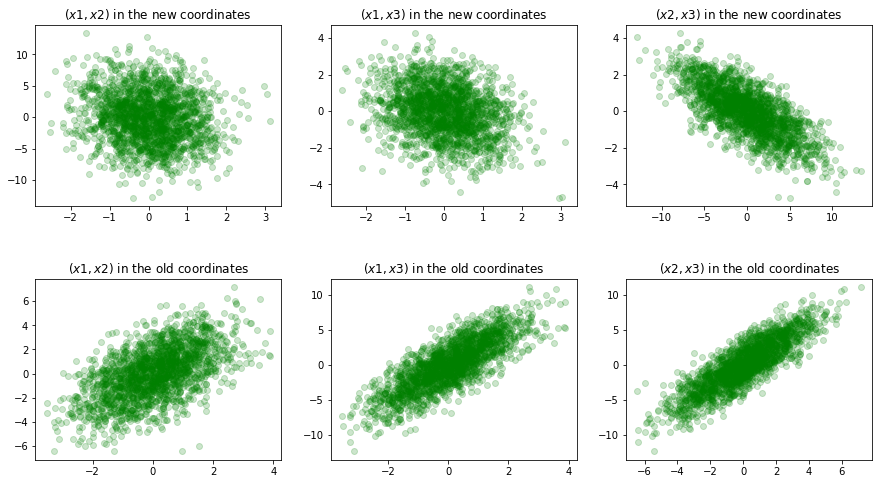

In [3]:
# uncorrelated random noise
n = 2000
mu1 = [0]
sigma_noise_1 = [[0.01]]
sigma_noise_2 = [[0.02]]
sigma_noise_3 = [[0.03]]
sigma_noise_4 = [[0.04]]
sigma_noise_5 = [[0.05]]
sigma_noise_6 = [[0.06]]
sigma_noise_7 = [[0.07]]
sigma_noise_8 = [[0.08]]
sigma_noise_9 = [[0.09]]
sigma_noise_10 = [[0.095]]

n1 = np.random.multivariate_normal(mu1, sigma_noise_1, n).reshape(2000,)
n2 = np.random.multivariate_normal(mu1, sigma_noise_2, n).reshape(2000,) 
n3 = np.random.multivariate_normal(mu1, sigma_noise_3, n).reshape(2000,)
n4 = np.random.multivariate_normal(mu1, sigma_noise_4, n).reshape(2000,)
n5 = np.random.multivariate_normal(mu1, sigma_noise_5, n).reshape(2000,)
n6 = np.random.multivariate_normal(mu1, sigma_noise_6, n).reshape(2000,)
n7 = np.random.multivariate_normal(mu1, sigma_noise_7, n).reshape(2000,)
n8 = np.random.multivariate_normal(mu1, sigma_noise_8, n).reshape(2000,)
n9 = np.random.multivariate_normal(mu1, sigma_noise_9, n).reshape(2000,)
n10 = np.random.multivariate_normal(mu1, sigma_noise_10, n).reshape(2000,)


# Dataset with 3 features each (x1,x2,x3) with N=2000 entries into the data DataFrame
n = 2000
mu1 = [0]
sigma1 = [[1]]
sigma2 = [[3]]
x1 = np.random.multivariate_normal(mu1, sigma1, n).reshape(2000,)
x2 = np.random.multivariate_normal(mu1, sigma2, n).reshape(2000,) + x1
x3 = 2*x1 + x2
x1 = x1 + n1 + n2 + n3 + n4 + n5 + n6 + n7 + n8 + n9 + n10
x2 = x2 + n1 + n2 + n3 + n4 + n5 + n6 + n7 + n8 + n9 + n10
x3 = x3 + n1 + n2 + n3 + n4 + n5 + n6 + n7 + n8 + n9 + n10
x1.shape,x2.size,x3.shape
data=pd.DataFrame({'x1':x1,'x2':x2,'x3':x3})
data

#covariance matrix of the dataset
cov_matrix=data.cov()
cov_matrix
l, v = np.linalg.eig(cov_matrix) #eigenvalues l and eigenvectors v
print("The eigenvalues are:",l,"\n","\nThe eigenvectors are: \n",v)

#SVD
U, spectrum, Vt = np.linalg.svd(cov_matrix)
l_svd = spectrum
v_svd = U
print("\nThe lsv eigenvalues are:",l_svd,"\n","\nThe lsv eigenvectors are: \n",v_svd)

#What percent of the total variability is explained by the principal components?
Lambda=np.diag(spectrum)
print(l)
print ("\nMatrix Lambda, with eigenvalues on the diagonal:\n",Lambda)
print ("\nLambda.trace():\n", Lambda.trace())
print ("\nVariability (%) of the first component:\n",Lambda[0,0]/Lambda.trace())
print ("\nVariability (%) retaining the first two components:\n",(Lambda[0,0]+Lambda[1,1])/Lambda.trace())

# plots

#Rotating all the data points accordingly to the new base
Xp = np.dot(data,v.T)

#rotated dataset - plot 1
fig=plt.figure(figsize=(15, 8))
#plt.subplots_adjust(hspace=0.4)
scatter1=fig.add_subplot(2,3,1)
plt.scatter(Xp[:,0], Xp[:,1], alpha=0.2, c='g')
#plt.axis([-5,5,-22,22]);
#scatter1.set_ylabel('$x1$')
#scatter1.set_xlabel('$x2$')
plt.title('($x1, x2$) in the new coordinates')

#rotated dataset - plot 2
plt.subplots_adjust(wspace=None, hspace=0.4)
scatter1=fig.add_subplot(2,3,2)
plt.scatter(Xp[:,0], Xp[:,2], alpha=0.2, c='g')
#plt.axis([-3,4,-7,7]);
#scatter1.set_ylabel('$x1$')
#scatter1.set_xlabel('$x3$')
plt.title('($x1, x3$) in the new coordinates')

#rotated dataset - plot 3
plt.subplots_adjust(wspace=None, hspace=0.4)
scatter1=fig.add_subplot(2,3,3)
plt.scatter(Xp[:,1], Xp[:,2], alpha=0.2, c='g')
#plt.axis([-5,5,-20,20]);
#scatter1.set_ylabel('$x2$')
#scatter1.set_xlabel('$x3$')
plt.title('($x2, x3$) in the new coordinates')

#old dataset - plot 1
scatter4=fig.add_subplot(2,3,4)
scatter4=plt.scatter(data['x1'], data['x2'], alpha=0.2,c='g')
#scatter4.set_ylabel('$x1$')
#scatter4.set_xlabel('$x2$')
plt.title('($x1, x2$) in the old coordinates')

#old dataset - plot 2
scatter4=fig.add_subplot(2,3,5)
scatter4=plt.scatter(data['x1'], data['x3'], alpha=0.2,c='g')
plt.title('($x1, x3$) in the old coordinates')

#old dataset - plot 3
scatter4=fig.add_subplot(2,3,6)
scatter4=plt.scatter(data['x2'], data['x3'], alpha=0.2,c='g')
plt.title('($x2, x3$) in the old coordinates');



3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


sidenote: by running the code multiple times, it is possible to see the randomness of the noise along the y axis, regardless of the chosen observer.

Lambda.trace():
 420.2174202716452

Variability of the first component:
 0.9999999999999996


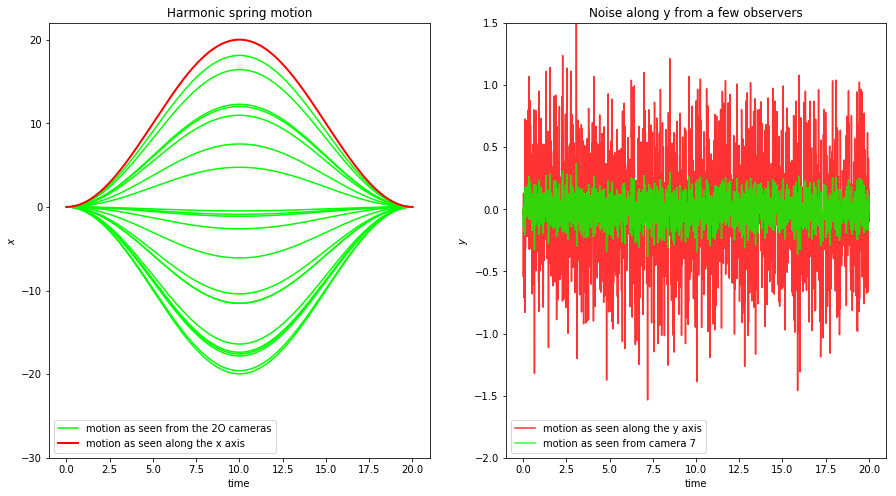

In [4]:
# cameras measurements along x and y (w/ noise along y):
n = 2000
mu_x = [5]
mu_y = [0]
sigma_noise_1 = [[0.001]]
sigma_noise_2 = [[0.2]]
w=0.1*np.pi
t=np.linspace(0,20,2000)
phi=np.pi
a=10

# motion along x and y as seen by an observer on x and y:
camera_x = a*np.cos(w*t-phi)+10.0
camera_y = np.random.multivariate_normal(mu_y, sigma_noise_2, n).reshape(2000,) 
camera_meas=pd.DataFrame({'x':camera_x,'y':camera_y})

# motion along x and y seen by the n cameras at (𝜃𝑖,𝜙𝑖):
theta=np.random.uniform(low=-2*np.pi,high=2*np.pi,size=(2,2000))

# motion along x and y as seen by the n cameras, deflected by (𝜃𝑖,𝜙𝑖):
n=20
deflected_camera_x=np.empty((2000,n))
deflected_camera_y=np.empty((2000,n))
for x in range(20):
    for i in range(2000):
        deflected_camera_x[i,x] = camera_x[i]*np.sin(theta[0,x])
        deflected_camera_y[i,x] = camera_y[i]*np.cos(theta[1,x])
        
# PLOT ALONG X
fig=plt.figure(figsize=(15, 8))
plot_cameras_x=fig.add_subplot(1,2,1)

# plot of the motion along x seen by an observer on x and y:
plt.plot(t,deflected_camera_x[:,1], c='lime',label='motion as seen from the 2O cameras')
plt.plot(t,deflected_camera_x[:,:], c='lime')

# plot of the motion along x seen by an observer on the x axis:
plt.plot(t,camera_meas['x'], c='r', label='motion as seen along the x axis',linewidth=2.0)
plt.title('Harmonic spring motion')
plt.xlabel('time')
plt.ylabel('$x$')
plt.ylim(-30,22)
plt.legend(loc='lower left')

# PLOT ALONG Y
plot_cameras_x=fig.add_subplot(1,2,2)
# plot of the motion along x seen by an observer on x and y:
plt.plot(t,camera_meas['y'], c='red', label='motion as seen along the y axis',alpha=0.8)

# plot of the motion along x seen by an observer on x and y:
#plt.plot(t,deflected_camera_y[:,0], c='blue',label='motion as seen from camera 0', alpha=0.5)
#plt.plot(t,deflected_camera_y[:,15], c='cyan',label='motion as seen from camera 15', alpha=0.5)
plt.plot(t,deflected_camera_y[:,7], c='lime',label='motion as seen from camera 7', alpha=0.8)
#plt.plot(t,deflected_camera_y[:,4], c='red',label='motion as seen from camera 4', alpha=0.5)
#plt.plot(t,deflected_camera_y[:,1], c='lime',label='motion as seen from camera 1', alpha=0.5)

plt.title('Noise along y from a few observers')
plt.xlabel('time')
plt.ylabel('$y$')
plt.ylim(-2,1.5)
plt.legend(loc='lower left')
print("sidenote: by running the code multiple times, it is possible to see the randomness of the noise along the y axis, regardless of the chosen observer.")

# PCA
#covariance matrix of the dataset
cov_matrix=np.cov(deflected_camera_x.T)
l, v = np.linalg.eig(cov_matrix) #eigenvalues l and eigenvectors v

#SVD
U, spectrum, Vt = np.linalg.svd(cov_matrix)
l_svd = spectrum
v_svd = U

#What percent of the total variability is explained by the principal components?
Lambda=np.diag(spectrum)
print ("\nLambda.trace():\n", Lambda.trace())
print ("\nVariability of the first component:\n",Lambda[0,0]/Lambda.trace())

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
#load the data into the pandas datatframe
magic04_df=pd.read_csv('/Users/lucamanenti/data/magic04.data')
magic04_df_numb=magic04_df.iloc[:,:10] #remotion of the string from the DataFrame (it is the last column)
magic_cov=np.cov(magic04_df_numb.T) #covariance matrix
magic_cov.shape #check it is 1Ox1O
magic04_l, magic04_v = np.linalg.eig(magic_cov) #eigenvalues and eigenvectors
magic04_df_numb_rotated = np.dot(magic04_v.T, magic04_df_numb.T) # rotation of the data points wrt to the new base